# Hamlet unter der Lupe

## Projektidee

* Hamlet einlesen
* Extraktion, was Hamlet gesagt hat
* Wie viele Worte verwendet Hamlet?
* Wie viele eindeutige Worte verwendet Hamlet?
* Wie viele eindeutige Worte verwendet Hamlet, die nicht Stopworte sind?
* Histogramm der häufigsten Worte
* Cloud-Tag der Worte
* Künstlichen Zufallssatz anhand der Wortwahrscheinlichkeiten generieren
* Bigrame und Trigrame erzeugen
* Häufigkeiten der Bigrame und Trigrame erzeugen
* Künstliche Sätze anhand der Häufigkeiten bilden

Einen Regulären Ausdruck der alle Blöcke findet, die von Hamlet gesprochen wurden und auf dem Originaltext beruht, habe ich bisher nicht gefunden. Passagen in denen Hamlet mehr als einen Satz sagt, habe ich derart zusammengefügt, dass sie nur aus einem zusammenhängenden String bestehen, der dann von jeweils zwei Leerzeichen begrenzt wird.
P.S. bitte melden, falls das jemand mit nur einem einzigen Regulären Ausdruck hinbekommt.

In [1]:
# Hamlet einlesen
filename = open('hamlet.txt')
text=filename.read()

# Problem zeigen

print (text[11500:13000])

# Wie sieht ein regulärer Ausdruck aus, der sowohl Einzelsätze von Hamlet 
# als auch Textblöcke extrahiert?
# Etwas in dieses Richtung funktioniert
# for match in re.findall(r'Ham\.\s*\n((?:.+\n)+)\n',hamlet_text):
#Bemerkung "(?:" ist eine Klammer die keine Gruppe bildet
#Ham. gefolgt von beliebig vielen Zeilen (aber mind 1) gefolgt von einem Zeilenumbruch
#Zeile ist ".*\n"


hy best graces spend it at thy will!--
But now, my cousin Hamlet, and my son--

Ham.
[Aside.] A little more than kin, and less than kind!

King.
How is it that the clouds still hang on you?

Ham.
Not so, my lord; I am too much i' the sun.

Queen.
Good Hamlet, cast thy nighted colour off,
And let thine eye look like a friend on Denmark.
Do not for ever with thy vailed lids
Seek for thy noble father in the dust:
Thou know'st 'tis common,--all that lives must die,
Passing through nature to eternity.

Ham.
Ay, madam, it is common.

Queen.
If it be,
Why seems it so particular with thee?

Ham.
Seems, madam! Nay, it is; I know not seems.
'Tis not alone my inky cloak, good mother,
Nor customary suits of solemn black,
Nor windy suspiration of forc'd breath,
No, nor the fruitful river in the eye,
Nor the dejected 'havior of the visage,
Together with all forms, moods, shows of grief,
That can denote me truly: these, indeed, seem;
For they are actions that a man might play;
But I have that within 

In [2]:
# alle Doppelzeilen eindeutig codieren
text = text.replace("\n\n", "###" )

# einfache Zeilen, die in einem Block sind aneinanderhängen
text = text.replace("\n", " ")

# Die doppelten Leerzeilen wieder herstellen
text = text.replace("###", "\n\n")

print (text[11500:13000])


hy best graces spend it at thy will!-- But now, my cousin Hamlet, and my son--

Ham. [Aside.] A little more than kin, and less than kind!

King. How is it that the clouds still hang on you?

Ham. Not so, my lord; I am too much i' the sun.

Queen. Good Hamlet, cast thy nighted colour off, And let thine eye look like a friend on Denmark. Do not for ever with thy vailed lids Seek for thy noble father in the dust: Thou know'st 'tis common,--all that lives must die, Passing through nature to eternity.

Ham. Ay, madam, it is common.

Queen. If it be, Why seems it so particular with thee?

Ham. Seems, madam! Nay, it is; I know not seems. 'Tis not alone my inky cloak, good mother, Nor customary suits of solemn black, Nor windy suspiration of forc'd breath, No, nor the fruitful river in the eye, Nor the dejected 'havior of the visage, Together with all forms, moods, shows of grief, That can denote me truly: these, indeed, seem; For they are actions that a man might play; But I have that within 

In [3]:
import re
regex = re.compile('Ham\. (.+)\n\n')
hamlet= regex.findall(text)

print(hamlet[:100])


['[Aside.] A little more than kin, and less than kind!', "Not so, my lord; I am too much i' the sun.", 'Ay, madam, it is common.', "Seems, madam! Nay, it is; I know not seems. 'Tis not alone my inky cloak, good mother, Nor customary suits of solemn black, Nor windy suspiration of forc'd breath, No, nor the fruitful river in the eye, Nor the dejected 'havior of the visage, Together with all forms, moods, shows of grief, That can denote me truly: these, indeed, seem; For they are actions that a man might play; But I have that within which passeth show; These but the trappings and the suits of woe.", 'I shall in all my best obey you, madam.', "O that this too too solid flesh would melt, Thaw, and resolve itself into a dew! Or that the Everlasting had not fix'd His canon 'gainst self-slaughter! O God! O God! How weary, stale, flat, and unprofitable Seem to me all the uses of this world! Fie on't! O fie! 'tis an unweeded garden, That grows to seed; things rank and gross in nature Possess it

In [4]:
# einen großen String raus machen
hamlet = " ".join(hamlet)
print (hamlet[:500])

[Aside.] A little more than kin, and less than kind! Not so, my lord; I am too much i' the sun. Ay, madam, it is common. Seems, madam! Nay, it is; I know not seems. 'Tis not alone my inky cloak, good mother, Nor customary suits of solemn black, Nor windy suspiration of forc'd breath, No, nor the fruitful river in the eye, Nor the dejected 'havior of the visage, Together with all forms, moods, shows of grief, That can denote me truly: these, indeed, seem; For they are actions that a man might pla


In [5]:
# Bereinigungen

# Alles weg, was zwischen [] steht
regex = re.compile('(\[.+?\])')
hamlet= regex.sub("",hamlet)

# Alle Satzzeichen entfernen
regex = re.compile('[\.!\?.:,;]')
hamlet = regex.sub("",hamlet)

# Alle -- entfernen
regex = re.compile('--')
hamlet = regex.sub(" ",hamlet)

print(hamlet[:1000])


 A little more than kin and less than kind Not so my lord I am too much i' the sun Ay madam it is common Seems madam Nay it is I know not seems 'Tis not alone my inky cloak good mother Nor customary suits of solemn black Nor windy suspiration of forc'd breath No nor the fruitful river in the eye Nor the dejected 'havior of the visage Together with all forms moods shows of grief That can denote me truly these indeed seem For they are actions that a man might play But I have that within which passeth show These but the trappings and the suits of woe I shall in all my best obey you madam O that this too too solid flesh would melt Thaw and resolve itself into a dew Or that the Everlasting had not fix'd His canon 'gainst self-slaughter O God O God How weary stale flat and unprofitable Seem to me all the uses of this world Fie on't O fie 'tis an unweeded garden That grows to seed things rank and gross in nature Possess it merely That it should come to this But two months dead nay not so much

In [6]:
# Tokens durch split() erstellen
# NLP-Tokenizer aus der NLTK- oder spaCy.io-Bibliothek können das noch besser
hamlettokens=hamlet.split()
print (hamlettokens[:100])

['A', 'little', 'more', 'than', 'kin', 'and', 'less', 'than', 'kind', 'Not', 'so', 'my', 'lord', 'I', 'am', 'too', 'much', "i'", 'the', 'sun', 'Ay', 'madam', 'it', 'is', 'common', 'Seems', 'madam', 'Nay', 'it', 'is', 'I', 'know', 'not', 'seems', "'Tis", 'not', 'alone', 'my', 'inky', 'cloak', 'good', 'mother', 'Nor', 'customary', 'suits', 'of', 'solemn', 'black', 'Nor', 'windy', 'suspiration', 'of', "forc'd", 'breath', 'No', 'nor', 'the', 'fruitful', 'river', 'in', 'the', 'eye', 'Nor', 'the', 'dejected', "'havior", 'of', 'the', 'visage', 'Together', 'with', 'all', 'forms', 'moods', 'shows', 'of', 'grief', 'That', 'can', 'denote', 'me', 'truly', 'these', 'indeed', 'seem', 'For', 'they', 'are', 'actions', 'that', 'a', 'man', 'might', 'play', 'But', 'I', 'have', 'that', 'within', 'which']


In [7]:
# Tokens normieren in Kleinbuchstaben
# Verwendung von List-Comprehension
hamletltokens=[word.lower() for word in hamlettokens]
hamletltokens[:10]

# Kurzversion von:
# hamletltokens=[]
# for word in hamlettokens:
#    word = word.lower()
#    hamlettokens.append(word)

['a', 'little', 'more', 'than', 'kin', 'and', 'less', 'than', 'kind', 'not']

In [8]:
# Wie viele Worte spendiert Shakespeare für Hamlet
print (len(hamletltokens))

10706


In [9]:
# Wie viele unterschiedliche Worte spendiert Shakespeare für Hamlet
uniqueltokens=set(hamletltokens)
print (len(uniqueltokens))

2517


In [10]:
# Basisstatistiken zur Wortlänge
import statistics
wortlaengen = [len(word) for word in hamletltokens]
print ("Mittelwert:", statistics.mean(wortlaengen))
print ("Modalwert: ", statistics.mode(wortlaengen))
print ("Median:    ", statistics.median(wortlaengen))
print ("Minimum:   ", min(wortlaengen))
print ("Maximum:   ", max(wortlaengen))
print ("Stdev:     ", statistics.stdev(wortlaengen))

Mittelwert: 4.077620026153559
Modalwert:  4
Median:     4.0
Minimum:    1
Maximum:    16
Stdev:      2.086465756139522


In [11]:
# Wie viele unterschiedliche Worte bleiben übrig, wenn man die Stoppworte eleminiert
stopwords = set(["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"])
# leider nur modernes Englisch
# Mengendifferenz bilden (sowohl uniqueltokens als auch stopwords sind Mengen)
uniqueltokens_nostop = uniqueltokens - stopwords
print (len(uniqueltokens_nostop))

2306


In [17]:
# Wie oft kommen diese unterschiedlichen Worte vor
# verwende ein Dictionary, um die Worte auszuzählen

tokendict_nostop = {ut : hamletltokens.count(ut) for ut in uniqueltokens_nostop}
tokendict = {ut : hamletltokens.count(ut) for ut in uniqueltokens}


# Kurzversion von:
# tokendict={}
# for ut in uniquelctokens:
#    tokendict[ut]=hamletltokens.count(ut)


{'stole': 1,
 'making': 3,
 'called': 1,
 'belike': 1,
 'buzz': 2,
 'youth': 4,
 'aunt-mother': 1,
 'signet': 1,
 "o'er": 2,
 'poison': 2,
 'devoutly': 1,
 'strict': 1,
 'censure': 3,
 'relative': 1,
 'wring': 1,
 'says': 1,
 'french': 2,
 'ducat': 1,
 "reserv'd": 1,
 'watch': 3,
 'wouldst': 2,
 'talk': 1,
 'clepe': 1,
 'ventages': 1,
 "murder'd": 1,
 'deal': 1,
 'animals': 1,
 'judgment': 4,
 'view': 1,
 'scorn': 1,
 'hide': 2,
 'imports': 1,
 'oft': 3,
 "milldew'd": 1,
 "they'll": 1,
 'reechy': 1,
 'throw': 3,
 'precious': 1,
 "'the": 2,
 'rouse': 1,
 'brief': 1,
 'feed': 3,
 'used': 1,
 'scenes': 1,
 "might'": 1,
 'natural': 2,
 'months': 2,
 'fellows': 1,
 'mass': 1,
 "'if": 1,
 'honest': 8,
 'does': 9,
 'lecherous': 1,
 'fight': 2,
 'proper': 1,
 'arrant': 2,
 'death': 8,
 'frighted': 1,
 'creatures': 3,
 'absent': 1,
 "suck'd": 1,
 'forgetting': 1,
 'lend': 1,
 'bawdry': 1,
 'away': 8,
 'withers': 1,
 'coldly': 1,
 'players': 12,
 'soul': 12,
 'hillo': 1,
 'panders': 1,
 'box': 1

In [18]:
from collections import Counter
# Mit einem Counter geht das sogar noch ein wenig einfacher
# Er liefert ein Dictionary direkter und hat die Methode most_common(n) mit der 
# die n häufigsten Worte ermittelt werden können

tokencounter_nostop = Counter(hamlettokens) 
tokencounter_nostop

Counter({'buzz': 1,
         'youth': 4,
         'aunt-mother': 1,
         'signet': 1,
         'poison': 2,
         'censure': 3,
         'wring': 1,
         'says': 1,
         'watch': 3,
         'eale': 1,
         'ventages': 1,
         'birth': 1,
         'judgment': 3,
         'blows': 1,
         'scorn': 1,
         'hide': 1,
         'imports': 1,
         "they'll": 1,
         "That's": 2,
         'unseen': 1,
         'throw': 3,
         'rouse': 1,
         'brief': 1,
         'used': 1,
         'natural': 2,
         'About': 1,
         'anything': 3,
         'mass': 1,
         'audience': 2,
         'lecherous': 1,
         'death': 8,
         "suck'd": 1,
         'forgetting': 1,
         'lend': 1,
         'bawdry': 1,
         "by'r": 1,
         'players': 12,
         'soul': 12,
         'spurns': 1,
         'Goes': 1,
         'box': 1,
         "Priam's": 1,
         'Soil': 1,
         'ere': 4,
         'majestical': 1,
         'most': 

In [24]:
# Häufigkeit der 20 Worte, die von Hamlet am meisten verwendet werden
topfreq = sorted(tokendict_nostop.items(), key=lambda x:x[1], reverse=True)[0:20]
topfreq

[('i', 223),
 ('o', 45),
 ('shall', 43),
 ('let', 42),
 ('thou', 42),
 ('sir', 41),
 ('come', 41),
 ('make', 36),
 ('man', 31),
 ('king', 29),
 ('know', 29),
 ("i'll", 29),
 ('like', 29),
 ('good', 28),
 ('mother', 27),
 ('say', 24),
 ('thee', 23),
 ('thy', 22),
 ('play', 22),
 ("'tis", 21)]

In [19]:
# was mit dem Counter-Objekt wesentlich einfacher geht
tokencounter_nostop.most_common(20)

[('the', 395),
 ('of', 254),
 ('and', 227),
 ('I', 223),
 ('to', 206),
 ('you', 197),
 ('a', 196),
 ('it', 153),
 ('in', 135),
 ('my', 131),
 ('not', 126),
 ('is', 113),
 ('that', 101),
 ('this', 98),
 ('his', 95),
 ('me', 95),
 ('be', 77),
 ('your', 77),
 ('for', 74),
 ('but', 71)]

In [28]:
# Liste der Worte, die von Hamlet nur ein einziges Mal verwendet wurden

onlyonce = [x[0] for x in tokendict.items() if x[1] == 1] 
print (len(onlyonce))

1675


In [29]:
# Liste der Worte, die von Hamlet mehr als ein einziges Mal verwendet wurden

morethanonce = [x[0] for x in tokendict.items() if x[1] > 1] 
print (len(morethanonce))

842


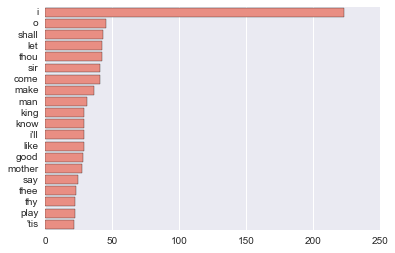

In [30]:
# bar chart der 20 meistverwendeten Worte
import seaborn as sns #sets up styles and gives us more plotting options
%matplotlib inline 
ax = sns.barplot(x=[e[1] for e in topfreq], y=[e[0] for e in topfreq], color="salmon")

(-0.5, 399.5, 199.5, -0.5)

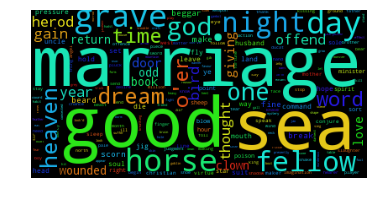

In [31]:
# Wordcloud der Worte, die von Hamlet verwendet werden (ohne Stoppworte)
# Infos zur Wordcloud: http://amueller.github.io/word_cloud/
from wordcloud import WordCloud
# installiert mit >conda install -c conda-forge wordcloud=1.2.1
import matplotlib.pyplot as plt #sets up plotting under pltb
wordcloud = WordCloud().generate(" ".join(uniqueltokens_nostop))
plt.imshow(wordcloud)
plt.axis("off")

In [32]:
# Ermittlung der Wahrscheinlichkeiten, mit der die Worte verwendet werden
# Eine Liste mit den Worten und eine korrespondierende Liste mit 
# Wahrscheinlichkeiten
words = [key for key in tokendict.keys()] 
print (words[:20])

probs = [i/len(hamlettokens) for i in tokendict.values()]
print (probs[:20])


["there's", 'did', 'neck', 'potency', 'hadst', 'inky', 'blows', 'sultry', 'presently', "look'd", 'grey', 'mystery', 'extant', 'conceited', 'darkest', 'murderous', 'bout', 'tricks', 'could', 'out-herods']
[0.0007472445357743321, 0.0016813002054922473, 0.00018681113394358303, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 9.340556697179151e-05, 0.001961516906407622, 9.340556697179151e-05]


In [33]:
# einen Zufallssatz generieren, wie ihn Hamlet entsprechend der Worthäufigkeiten
# ebenfalls sagen könnte
import numpy as np
np.random.choice(words, 100, p=probs)

array(['fellow', 'still', 'be', 'censure', 'this', 'nothing', 'would',
       'your', 'away', 'if', 'the', 'you', 'for', 'it', 'it', 'you',
       'know', 'comedy', 'them', 'bold', 'i', 'life', 'had', 'or',
       "o'erstep", 'of', "slave's", 'so', 'was', 'shame', 'from', 'i',
       'basket', 'my', 'cruel', 'what', 'so', 'noise', 'not', 'double',
       'if', 'moon', 'the', 'are', 'your', 'contents', 'and', 'heel',
       'loves', 'against', 'you', 'finger', 'farewell', 'but', 'supper',
       'are', 'the', 'mouth', 'to', 'hand', 'virtue', 'providence',
       'express', 'your', "if't", 'might', 'heart', 'no', 'him', 'unwrung',
       'night', 'to', 'nomination', 'to', 'the', 'who', 'for', 'between',
       'that', 'bound', 'finger', 'in', 'wind', 'and', 'good', 'neither',
       'part', 'good', 'or', 'dread', 'body', 'and', 'blush', 'me', 'my',
       'lend', 'baser', 'of', 'with', 'serves'], 
      dtype='<U16')

In [ ]:
# NGrame aus dem ursprünglichen bereinigten Text erzeugen
def ngrams(words, n):
    return [words[i:i+n] for i in range(len(words)-n+1)]

bigrams = ngrams(hamlet.split(), 2)
anzBigrams = len(bigrams)
trigrams = ngrams(hamlet.split(),3)
anzTrigrams = len(trigrams)

# Bigrame in ein Array von Strings umwandeln
bigrams = [" ".join(bigram) for bigram in bigrams]
trigrams = [" ".join(trigram) for trigram in trigrams]



In [ ]:
# Häufigkeiten der Bigrame und Trigrame mit Hilfe eines Dictionarys ermitteln

bigramsDict = dict()
for bigram in bigrams:
    bigramsDict[bigram] = bigramsDict.get(bigram, 0) + 1

trigramsDict = dict()
for trigram in trigrams:
    trigramsDict[trigram] = trigramsDict.get(trigram, 0) + 1   

In [ ]:
# Ermittlung der Wahrscheinlichkeiten, mit der die Bigrame verwendet werden
# Eine Liste mit den Bigramen und eine korrespondierende Liste mit 
# Wahrscheinlichkeiten
bigrams = [key for key in bigramsDict.keys()] 
print (bigrams[:20])

probsBigrams = [i/anzBigrams for i in bigramsDict.values()]
print (probsBigrams[:20])


In [ ]:
# einen Zufallssatz generieren, wie ihn Hamlet entsprechend der Bigramhäufigkeiten
# ebenfalls sagen könnte

" ".join(np.random.choice(bigrams, 10, p=probsBigrams))

In [ ]:
# einen Zufallssatz generieren, wie ihn Hamlet entsprechend der Trigramhäufigkeiten
# ebenfalls sagen könnte
import numpy as np
" ".join(np.random.choice(bigrams, 10, p=probsBigrams))